In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('/content/placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# New Section

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [16]:
df = df.iloc[:, 1:]

In [17]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ')

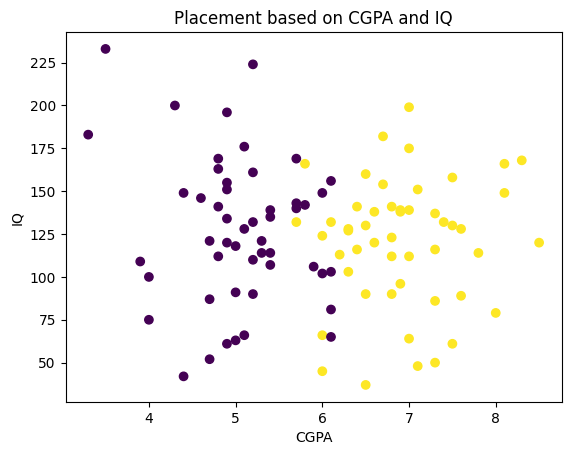

In [19]:
plt.scatter(df['cgpa'], df['iq'], c= df['placement'])
plt.title('Placement based on CGPA and IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [20]:
X = df.iloc[:, 0:2]

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y = df.iloc[:, 2:3]

In [23]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [26]:
X_train

,cgpa,iq
50,3.5,233.0
21,7.1,151.0
17,3.3,183.0
81,5.4,107.0
9,5.1,66.0
...,...,...
10,6.0,45.0
61,7.3,137.0
76,4.9,155.0
48,6.6,138.0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_train

array([[-2.13661919e+00,  2.76512272e+00],
       [ 9.67706449e-01,  7.03224602e-01],
       [-2.30908172e+00,  1.50786777e+00],
       [-4.98225102e-01, -4.03159754e-01],
       [-7.56918905e-01, -1.43410881e+00],
       [ 1.31263152e+00,  1.75177523e-01],
       [-4.98225102e-01, -2.27144061e-01],
       [ 1.91625039e-02,  2.43069290e-02],
       [ 2.77856307e-01,  9.97422261e-02],
       [-6.70687638e-02, -4.28304853e-01],
       [ 7.09012645e-01, -8.30626437e-01],
       [-9.29381441e-01,  7.03224602e-01],
       [ 1.14016898e+00, -1.76853863e-01],
       [-4.98225102e-01,  4.01483414e-01],
       [ 7.09012645e-01,  4.51773612e-01],
       [ 1.22640025e+00,  2.25467721e-01],
       [-4.98225102e-01,  3.00903018e-01],
       [ 3.64087575e-01, -1.76853863e-01],
       [ 1.91625039e-01, -2.52289160e-01],
       [-1.10184398e+00, -9.06061734e-01],
       [-9.29381441e-01, -7.62734670e-02],
       [ 7.95243913e-01,  4.01483414e-01],
       [ 7.09012645e-01, -8.38169967e-04],
       [ 4.

In [32]:
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
y_pred = clf.predict(X_test)

In [37]:
y_test


,placement
19,0
57,1
44,1
26,1
46,0
79,1
34,0
67,0
98,1
52,1


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

1.0

In [42]:
import pickle

In [43]:
pickle.dump(clf, open('model.pkl', 'wb'))